In [ ]:
import warnings
import pandas as pd
warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)

In [ ]:
!pip install tensorflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
df = pd.read_csv('/content/drive/MyDrive/UU/ETH-USD (BaoCao).csv')
df = df.groupby('Date').sum()

In [44]:
!pip install keras

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 

In [45]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-01,136.836243,138.995270,136.434784,136.443619,136.443619,3756124824
2019-03-02,136.350082,137.184799,132.436386,134.206955,134.206955,3747176425
2019-03-03,134.786118,135.849289,131.328857,132.249420,132.249420,3454374053
2019-03-04,132.157883,132.729141,125.402702,127.774124,127.774124,4008171341
2019-03-05,127.792953,138.229980,126.735298,137.822388,137.822388,4764849990
...,...,...,...,...,...,...
2024-05-28,3892.096924,3924.895752,3771.213867,3840.256348,3840.256348,19846044324
2024-05-29,3840.235107,3880.648438,3742.041260,3763.196533,3763.196533,17411416736
2024-05-30,3763.357666,3823.643311,3702.263672,3746.849609,3746.849609,15065849797


In [46]:
import numpy as np
data = df[['Close']]
# Convert the dataframe to a numpy array
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .9 ))
dataset

array([[ 136.443619],
       [ 134.206955],
       [ 132.24942 ],
       ...,
       [3746.849609],
       [3760.026611],
       [3813.198975]])

In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00549566],
       [0.00501992],
       [0.00460356],
       ...,
       [0.77342508],
       [0.77622782],
       [0.78753752]])

In [48]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

# we use 60 days ahead for forecasting range
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00549566, 0.00501992, 0.00460356, 0.00365167, 0.00578892,
       0.0059946 , 0.00583404, 0.00521563, 0.00581933, 0.00556267,
       0.0049406 , 0.00507011, 0.00481916, 0.00491456, 0.00576114,
       0.00676219, 0.00625222, 0.00611908, 0.00636253, 0.00639809,
       0.00553659, 0.00565259, 0.00587772, 0.00561122, 0.0051952 ,
       0.00528652, 0.00646228, 0.00612798, 0.0067833 , 0.00669721,
       0.00657415, 0.00664141, 0.01134874, 0.01081636, 0.01009185,
       0.01167908, 0.01177104, 0.01359694, 0.01481511, 0.01393363,
       0.01419374, 0.01167529, 0.01151349, 0.01146606, 0.01217332,
       0.0108409 , 0.01212758, 0.0119845 , 0.01344431, 0.01342185,
       0.01343096, 0.01264296, 0.01303181, 0.01294101, 0.01174528,
       0.0093276 , 0.00972911, 0.01017319, 0.00993074, 0.00948555])]
[0.010966789443277211]

[array([0.00549566, 0.00501992, 0.00460356, 0.00365167, 0.00578892,
       0.0059946 , 0.00583404, 0.00521563, 0.00581933, 0.00556267,
       0.0049406 , 0.00507011, 0.0

<Axes: xlabel='Date'>

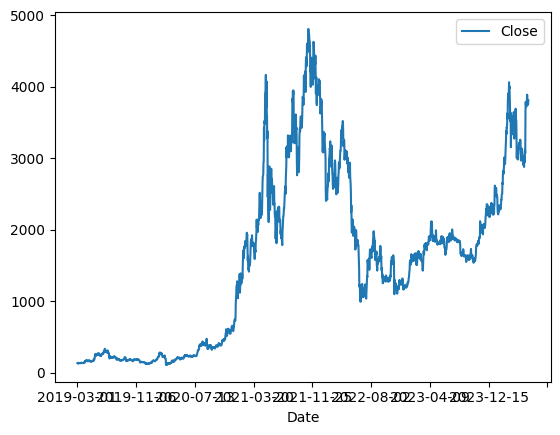

In [49]:
data.plot()

In [50]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


1668/1668 [==============================] - 114s 65ms/step - loss: 0.0026


In [51]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)

6/6 [==============================] - 1s 42ms/step


In [52]:
# Inverse scaling to get predictions in original scale
predictions = scaler.inverse_transform(predictions)

In [53]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

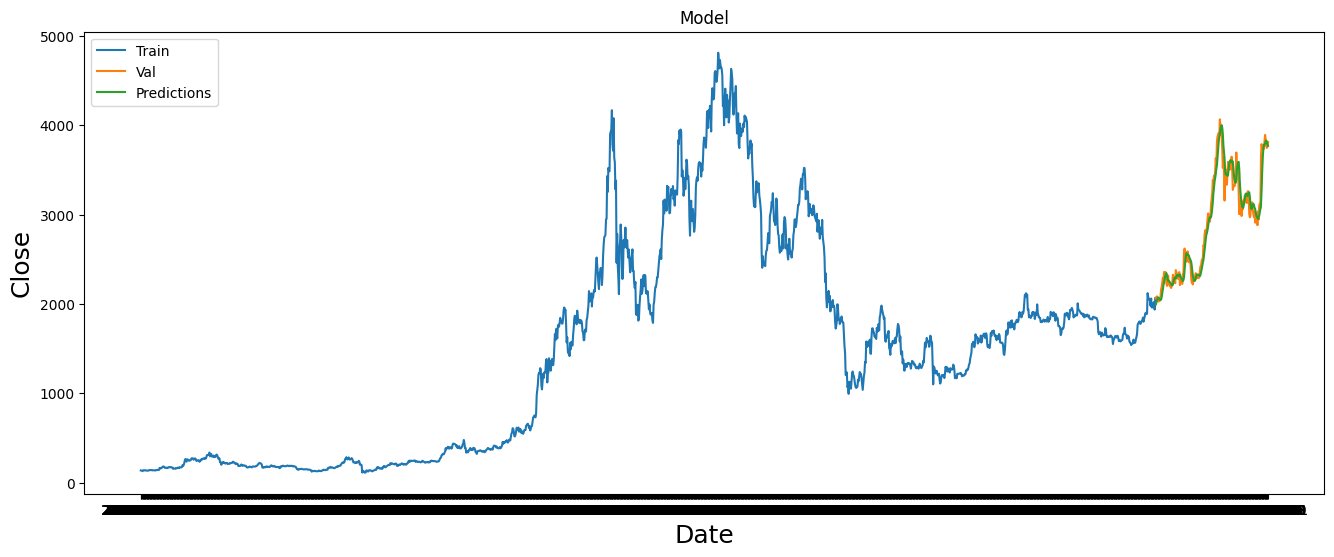

In [54]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()